In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [4]:
df=df.drop(columns="New")
df=df.drop(columns="PendingS")

In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [6]:
df = df.dropna(subset=['ship-postal-code','ship-city','ship-state','ship-country'])

In [7]:
df['ship-postal-code']=df['ship-postal-code'].astype("int")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128941 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128941 non-null  int64  
 1   Order ID            128941 non-null  object 
 2   Date                128941 non-null  object 
 3   Status              128941 non-null  object 
 4   Fulfilment          128941 non-null  object 
 5   Sales Channel       128941 non-null  object 
 6   ship-service-level  128941 non-null  object 
 7   Category            128941 non-null  object 
 8   Size                128941 non-null  object 
 9   Courier Status      128941 non-null  object 
 10  Qty                 128941 non-null  int64  
 11  currency            121143 non-null  object 
 12  Amount              121143 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-null  in

In [9]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\Bharath Reddy\AppData\Local\Temp\ipykernel_1576\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [10]:
df['Date']

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
128975   2022-05-31
Name: Date, Length: 128941, dtype: datetime64[ns]

In [11]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7798
Amount                 7798
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

In [12]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128941.000000,128941,128941.000000,121143.000000,128941.000000
mean,64487.286340,2022-05-12 11:51:10.306574336,0.904414,648.576874,463945.677744
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32247.000000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64486.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,96731.000000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37231.274722,NaN,0.313356,281.196896,191458.488954


In [13]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,NaN


In [14]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,128941.000000,121143.000000
mean,0.904414,648.576874
std,0.313356,281.196896
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [15]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [16]:
df['currency']=df['currency'].fillna('INR')

In [17]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                 7798
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

In [18]:
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

In [19]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

In [20]:
print(f"The Minimum and Maximul values of the 'Amount' coulmn are {max(df['Amount'])} and {min(df['Amount'])}")

The Minimum and Maximul values of the 'Amount' coulmn are 5584.0 and 0.0


In [21]:
# Scaling the values to decrese the scale of Amount
scaler=MinMaxScaler(feature_range=(0,5.584))

In [22]:
df['Amount']=scaler.fit_transform(df[['Amount']])
max(df['Amount'])

5.5840000000000005

In [23]:
df.rename(columns={"Amount" : "AmountX1000"})
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,0.64762,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,0.40600,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,0.32900,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,0.75333,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,0.57400,CHENNAI,TAMIL NADU,600073,IN,False,NaN


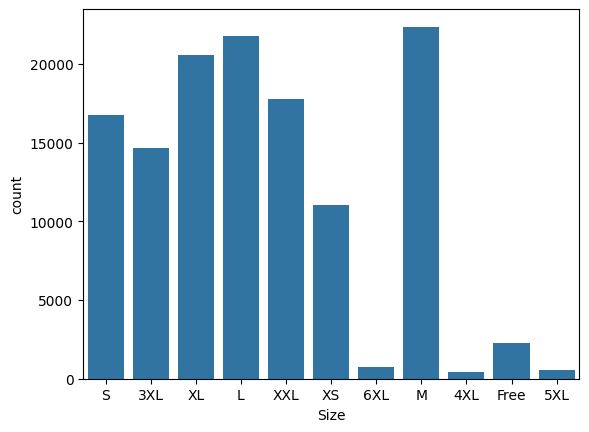

In [24]:
# Qunatity of orders for each size of clothing
count=sns.countplot(x='Size',data=df)

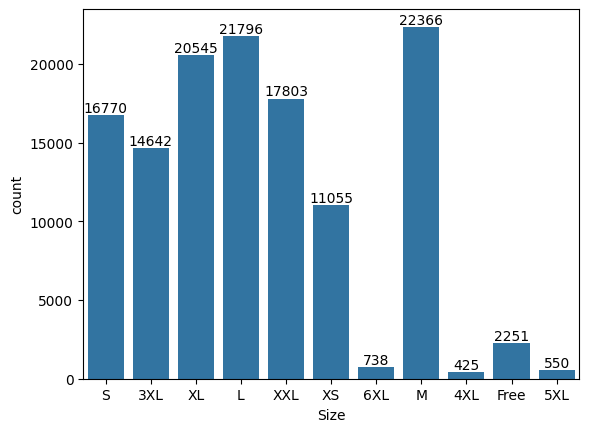

In [25]:
count=sns.countplot(x='Size',data=df)
for i in count.containers:
    count.bar_label(i)

In [26]:
g_df=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
g_df

,Size,Qty
6,M,20133
5,L,19695
8,XL,18633
10,XXL,16243
7,S,15037
0,3XL,13359
9,XS,9849
4,Free,2070
3,6XL,688
2,5XL,513


<Axes: xlabel='Size', ylabel='Qty'>

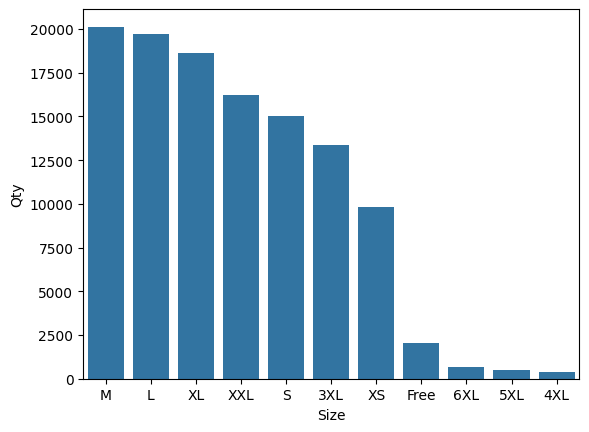

In [27]:
sns.barplot(x=g_df['Size'],y=g_df['Qty'],data=g_df)

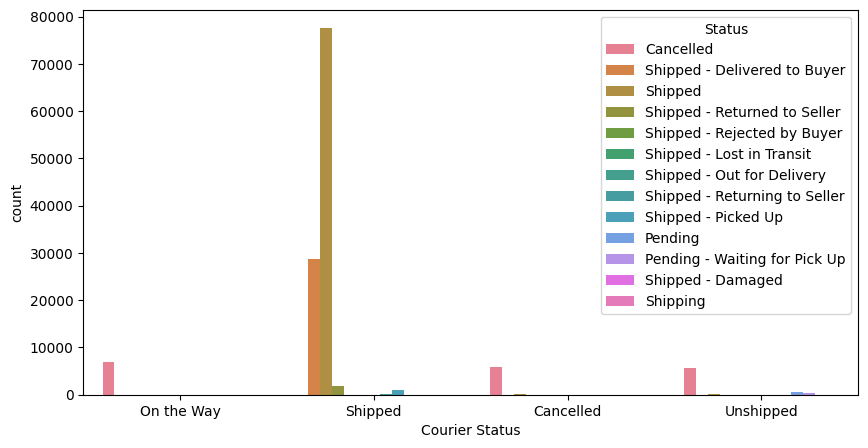

In [28]:
# Distribution of courier status
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')
plt.show()

<Axes: xlabel='Size', ylabel='Count'>

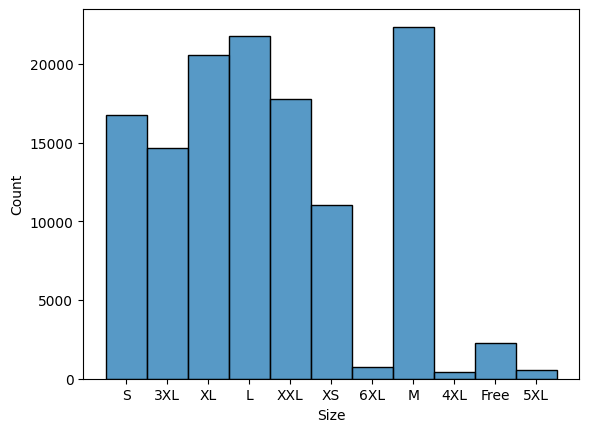

In [29]:
sns.histplot(x="Size",data=df)

<Axes: xlabel='Category', ylabel='Count'>

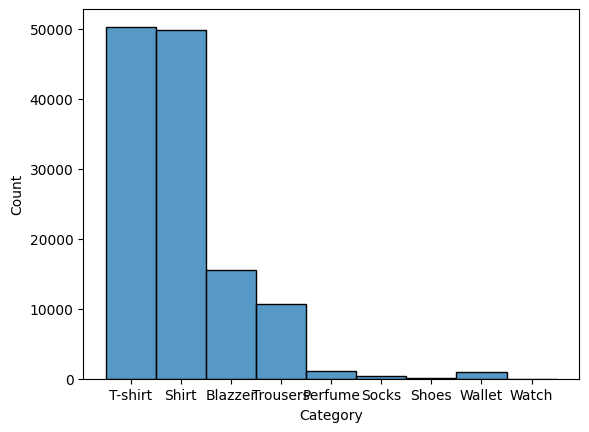

In [30]:
sns.histplot(x="Category",data=df)

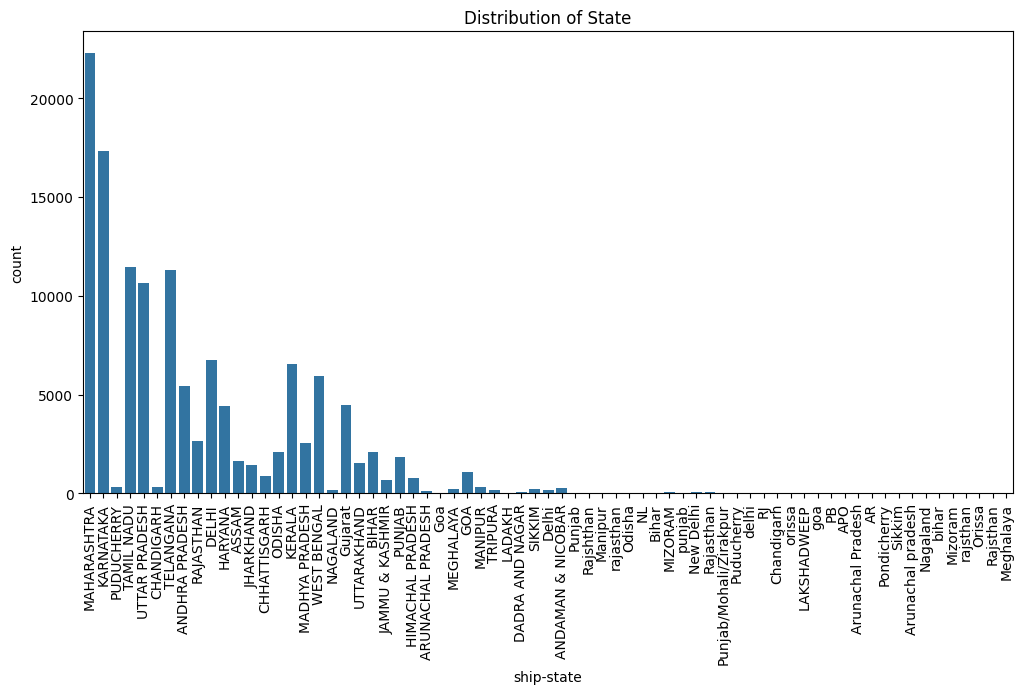

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

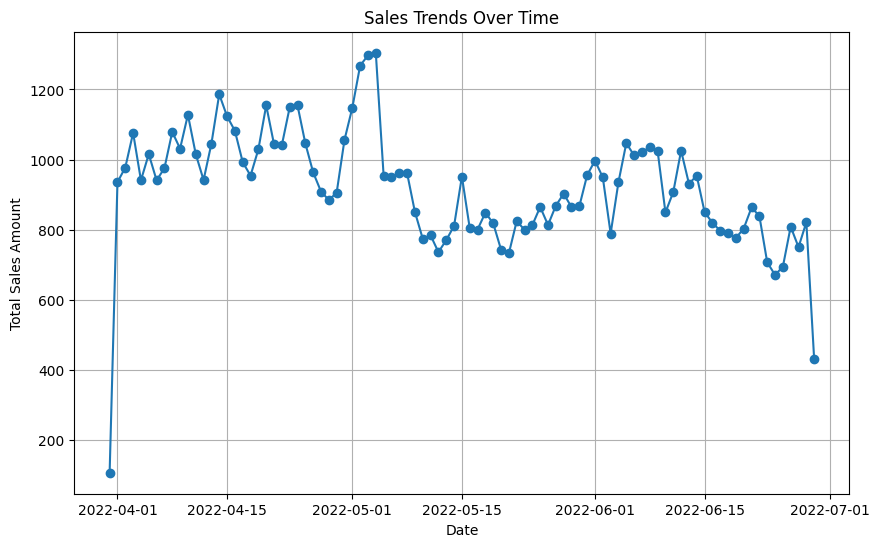

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df_grouped = df.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Date'], df_grouped['Amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

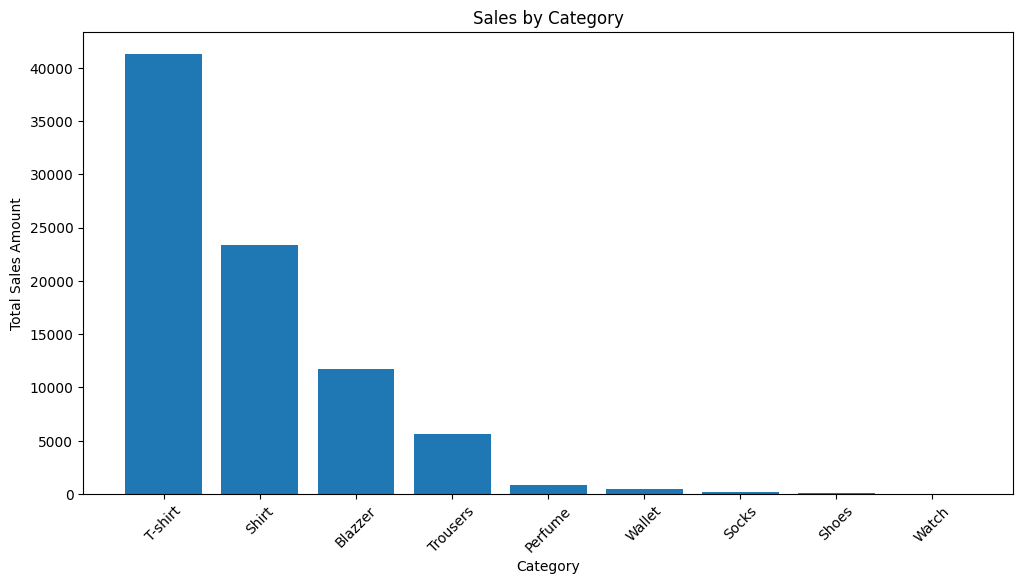

In [33]:
category_sales = df.groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(category_sales['Category'], category_sales['Amount'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

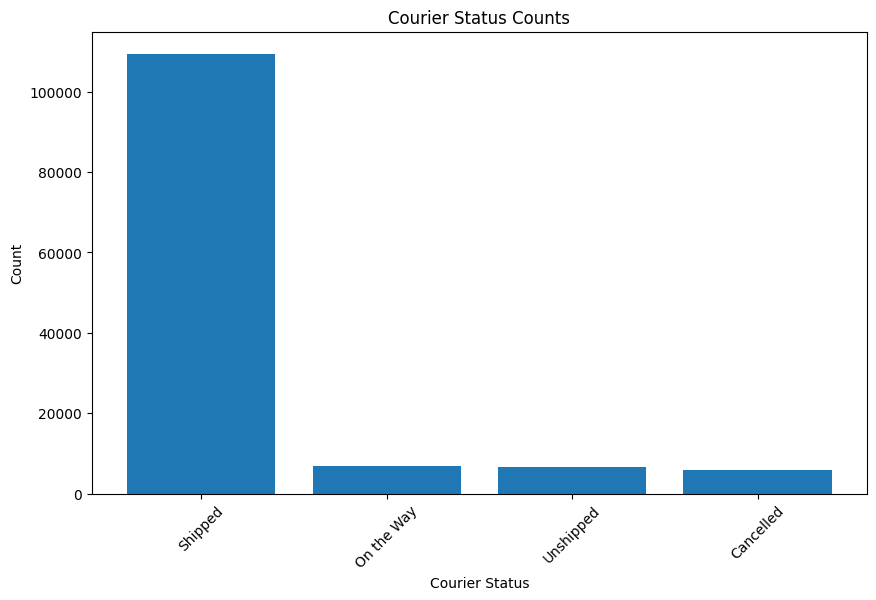

In [34]:
courier_performance = df['Courier Status'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(courier_performance.index, courier_performance.values)
plt.title('Courier Status Counts')
plt.xlabel('Courier Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,0.64762,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,0.40600,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,0.32900,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,0.75333,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,0.57400,CHENNAI,TAMIL NADU,600073,IN,False,NaN
